In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [92]:
#encoding holidays

#let's start by getting a list of holidays in the us

import holidays
us_holidays = holidays.US()

In [8]:
data = pd.read_csv('data/raw/PJME_hourly.csv', index_col=[0], parse_dates=[0])

#note that we can use squeeze = True to have the data imported as a series rather than a df
#this can make tsa easier

In [343]:
d = pd.Timestamp('7/1/2019') #the format that is used is american format, with months first and days second

In [349]:
d.weekday_name

C:\Users\pc\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: `weekday_name` is deprecated and will be removed in a future version. Use `day_name` instead
  """Entry point for launching an IPython kernel.


'Monday'

In [354]:
#time deltas are periods
delta = pd.Timedelta('5 day')

In [357]:
d2 = d + delta
d2.day_name()

'Saturday'

In [358]:
my_range = pd.date_range(start = '2020-1-1', end = '2020-9-1', freq = 'B')

In [359]:
my_range #note that business days don't exclude holidays by default

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-06',
               '2020-01-07', '2020-01-08', '2020-01-09', '2020-01-10',
               '2020-01-13', '2020-01-14',
               ...
               '2020-08-19', '2020-08-20', '2020-08-21', '2020-08-24',
               '2020-08-25', '2020-08-26', '2020-08-27', '2020-08-28',
               '2020-08-31', '2020-09-01'],
              dtype='datetime64[ns]', length=175, freq='B')

In [360]:
#periods
july17 = pd.Period('7/2017')

In [365]:
july17.start_time < pd.Timestamp('2017-7-2')

True

In [368]:
dr = pd.date_range(start = '2020-6-2', periods=10, freq='2h20min')

In [372]:
dp = dr[0].to_period()

In [373]:
dr2 = dp.to_timestamp()

In [375]:
dr2

Timestamp('2020-06-02 00:00:00')

In [378]:
def parse_european_date(datestr):
    #datestr will have a dd/mm/yyyy format, we need to convert it to mm/dd/yyyy before making it into a timestamp
    d, m, y = datestr.split('/')
    american_date = m + '/' + d + '/' + y
    return pd.Timestamp(american_date)

In [379]:
parse_european_date('7/2/2019')

Timestamp('2019-02-07 00:00:00')

In [381]:
dr2.strftime(format = '%D%M%y')

'06/02/200020'

In [382]:
pd.__version__

'0.25.1'

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 145366 entries, 2002-12-31 01:00:00 to 2018-01-02 00:00:00
Data columns (total 1 columns):
PJME_MW    145366 non-null float64
dtypes: float64(1)
memory usage: 2.2 MB


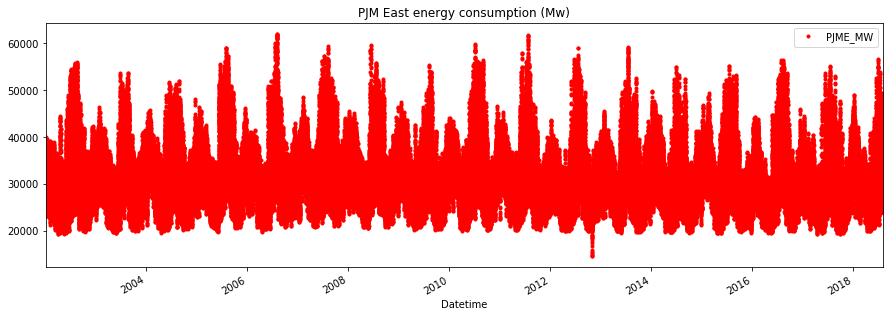

In [131]:
data.plot(style='.', figsize=(15,5), color='red', title='PJM East energy consumption (Mw)')

In [155]:
#creating features:
nrg_cons = data.copy()

In [156]:
nrg_cons['date_time'] = nrg_cons.index
nrg_dt = nrg_cons.date_time
nrg_cons['date'] = nrg_dt.dt.date
nrg_cons['day'] = nrg_dt.dt.day
nrg_cons['month'] = nrg_dt.dt.month
nrg_cons['year'] = nrg_dt.dt.year
nrg_cons['wday'] = nrg_dt.dt.dayofweek
nrg_cons['yday'] = nrg_dt.dt.dayofyear
nrg_cons['yweek'] = nrg_dt.dt.weekofyear
nrg_cons['hour'] = nrg_dt.dt.hour
nrg_cons['quarter'] = nrg_dt.dt.quarter

nrg_cons = nrg_cons.sort_values(by='date_time')

#other things to include would be:
#average temperature in that area at that time
#weekends
#morning / night
#holidays

#things to investigate:
#can we predict energy demand effectively
#can we see how energy demand depends on weather, on holidays, on other things
#this might require getting additional data: but we can probably get data about where this is from, and combine it with weather
#data from that area, at least general weather data, though the time series might be different
#what other things could affect energy demand;
#economic activity
#days after or before a holiday
#summer vacation time: is the area in a location that fills or empties during the summer

In [158]:
nrg_cons.head()

,PJME_MW,date_time,date,day,month,year,wday,yday,yweek,hour,quarter
Datetime,,,,,,,,,,,
2002-01-01 01:00:00,30393.0,2002-01-01 01:00:00,2002-01-01,1,1,2002,1,1,1,1,1
2002-01-01 02:00:00,29265.0,2002-01-01 02:00:00,2002-01-01,1,1,2002,1,1,1,2,1
2002-01-01 03:00:00,28357.0,2002-01-01 03:00:00,2002-01-01,1,1,2002,1,1,1,3,1
2002-01-01 04:00:00,27899.0,2002-01-01 04:00:00,2002-01-01,1,1,2002,1,1,1,4,1
2002-01-01 05:00:00,28057.0,2002-01-01 05:00:00,2002-01-01,1,1,2002,1,1,1,5,1


In [107]:
nrg_cons.head()

,PJME_MW,date_time,date,day,month,year,wday,yday,hour,quarter
Datetime,,,,,,,,,,
2002-01-01 01:00:00,30393.0,2002-01-01 01:00:00,2002-01-01,1,1,2002,1,1,1,1
2002-01-01 02:00:00,29265.0,2002-01-01 02:00:00,2002-01-01,1,1,2002,1,1,2,1
2002-01-01 03:00:00,28357.0,2002-01-01 03:00:00,2002-01-01,1,1,2002,1,1,3,1
2002-01-01 04:00:00,27899.0,2002-01-01 04:00:00,2002-01-01,1,1,2002,1,1,4,1
2002-01-01 05:00:00,28057.0,2002-01-01 05:00:00,2002-01-01,1,1,2002,1,1,5,1


In [159]:
#applying holidays and related features

nrg_cons['holiday'] = nrg_cons['date'].apply(lambda d: d in us_holidays)
nrg_cons['before_hol'] = nrg_cons['date'].apply(lambda d: d+delta in us_holidays)
nrg_cons['after_hol'] = nrg_cons['date'].apply(lambda d: d-delta in us_holidays)

In [114]:
nrg_cons.to_csv('data/processed/nrg_cons.csv')

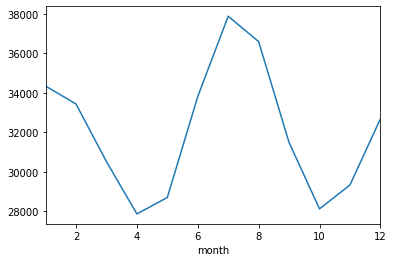

In [85]:
months = nrg_cons.groupby('month').PJME_MW.mean()
months.plot()

In [41]:
#we see a clear drop in april and may, followed by a peak in july august, and another dip in october before going up again
#in the winter; most likely, we are seeing peaks related to weather extremes, both hot and cold, with air con and heating being
#big sources of energy demand

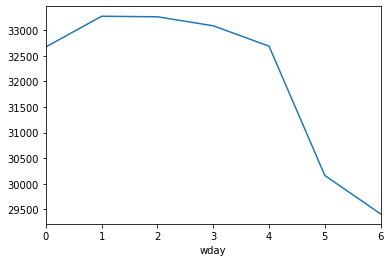

In [42]:
wdays = nrg_cons.groupby('wday').PJME_MW.mean()
wdays.plot()

In [43]:
#this corresponds to what we might expect: energy demand is pretty consistent through the five weekdays, and dips a lot on 
#Saturday and Sunday, probably due to much reduced industrial demand during the weekend

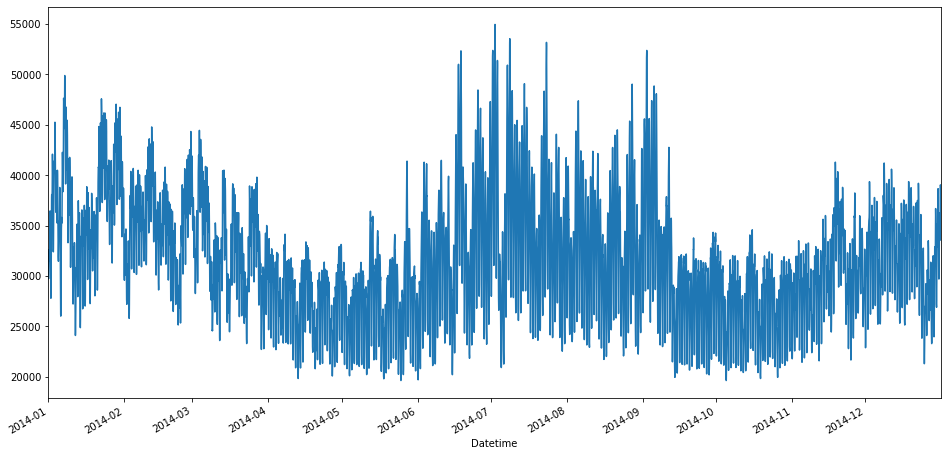

In [46]:
#let's see if we can identify the holidays that matter by looking at a year or two of data

twentyfourteen = nrg_cons[nrg_cons.year == 2014]
twentyfourteen.PJME_MW.plot(figsize = (16, 8))

In [ ]:
#the graph is not so easy to read because we see data for every hour; let's first sum everything by day

In [48]:
twenty14_days = twentyfourteen.groupby(['month','day']).PJME_MW.sum()

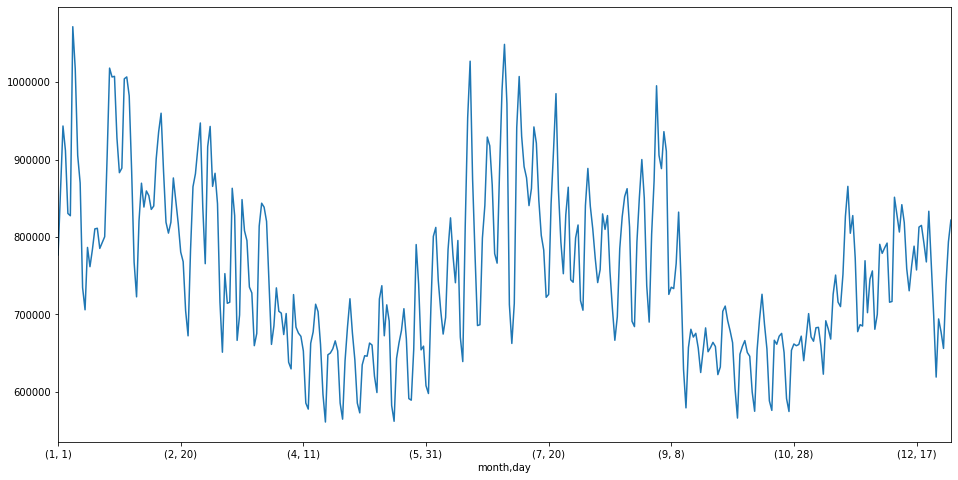

In [50]:
twenty14_days.plot(figsize = (16,8))

In [51]:
#this gives us something a lot more readable:
# there's a peak in January followed by low point for a few days
# fourth of July seems to have a significant effect
#there's a spike around end of August, then the fall from mid September is very significant
#something's going on in November, it might be that Thanksgiving actually causes a spike, or black friday, this is more visible
#in 2014 than in 2015
#there's probably a drop at Christmas

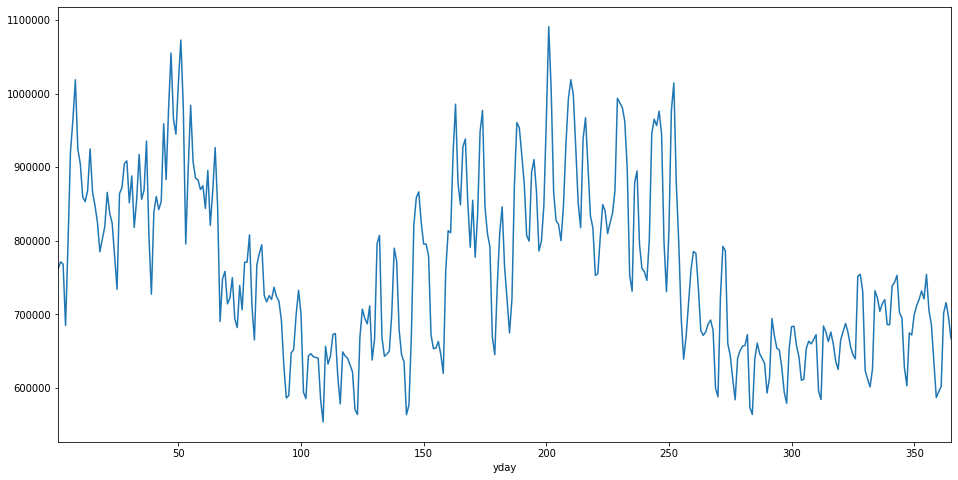

In [60]:
#checking 2015 to see if trends are similar:
twenty15 = nrg_cons[nrg_cons.year == 2015]
twenty15_days = twenty15.groupby(['yday']).PJME_MW.sum()
twenty15_days.plot(figsize = (16,8))


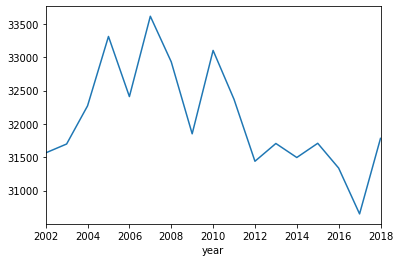

In [55]:
#looking at yearly trends

year_trend = nrg_cons.groupby('year').PJME_MW.mean()
year_trend.plot()

In [56]:
#energy consumption went up quite significantly between 2002 and 2007, then down, back up in 2010, then dropped significantly
#technically, 2018 should be in our test set so we shouldn't look at it; we should make our split around 2016 to see if we can 
#predict the last 2 years

In [58]:
#just checking that we have the same number of observations and clean data around

year_n_obs = nrg_cons.groupby('year').PJME_MW.count()
year_n_obs
#we don't have perfectly clean data, but it seems pretty close; 2004, 2008, 2012, and 2016 are leap years which is why they
#have more observations; 2018 is probably incomplete, it might be better to drop it altogether and just test how well we can 
#predict 2017 based on the information we have, then see whether integrating weather forecasts and economic data could have 
#made our model better

year
2002    8757
2003    8758
2004    8782
2005    8758
2006    8758
2007    8758
2008    8782
2009    8758
2010    8757
2011    8758
2012    8782
2013    8758
2014    8760
2015    8760
2016    8784
2017    8760
2018    5136
Name: PJME_MW, dtype: int64

In [ ]:
#some hypothesis:
#temperature explains a lot, and is actually the biggest overall predictor of energy demand
# public holidays and weekends also play a role; 

#mondays and fridays have a little lower energy demand than other days, but we need to check if this is something that holds
#up all the time or if it's because of a few mondays and fridays that are taken as extra days off by a lot of people

#2017 seems like a bad year to predict because the energy demand is a lot lower on average than all the other years, and right 
#now, there's no explanation that comes to mind for that: it's maybe better to see if we can predict 2016 energy consumption

In [161]:
ttspl = nrg_cons.copy()
train = ttspl[ttspl.year<2016]
test = ttspl[ttspl.year.isin([2016, 2017])]

In [162]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 122686 entries, 2002-01-01 01:00:00 to 2015-12-31 23:00:00
Data columns (total 14 columns):
PJME_MW       122686 non-null float64
date_time     122686 non-null datetime64[ns]
date          122686 non-null object
day           122686 non-null int64
month         122686 non-null int64
year          122686 non-null int64
wday          122686 non-null int64
yday          122686 non-null int64
yweek         122686 non-null int64
hour          122686 non-null int64
quarter       122686 non-null int64
holiday       122686 non-null bool
before_hol    122686 non-null bool
after_hol     122686 non-null bool
dtypes: bool(3), datetime64[ns](1), float64(1), int64(8), object(1)
memory usage: 11.6+ MB


In [118]:
train.groupby(['month', 'holiday']).PJME_MW.mean()

month  holiday
1      False      34642.026403
       True       32406.034771
2      False      33845.485127
       True       34981.279762
3      False      30732.523590
4      False      28096.483871
5      False      28902.468155
       True       29065.434524
6      False      34105.242956
7      False      38220.813602
       True       34126.185185
8      False      36639.708813
9      False      31561.301314
       True       30956.523810
10     False      28272.012010
       True       28860.214286
11     False      29562.602293
       True       28590.587366
12     False      32842.006442
       True       29778.662500
Name: PJME_MW, dtype: float64

### It's obvious from this that not holidays matter equally

- in January, we see a drop of energy consumption in holidays, of about 6%. This is similar to the drop that we observe between week days and weekends, so it's significant.
- in February, it rises by about 3% on holidays  
- in May, the difference is negligible  
- in July, the fall is significant  
- in September, it doesn't seem to matter much, same for october and November  
- in december, there's a very significant drop  


From this, we would guess the following things:
- Major holidays we would expect to be New Year, 4th of July, and Christmas.
- Minor holidays are Martin Luther King day, President's day, Easter (doesn't seem to appear in the holiday calendar), Labor Day, Colombus Day, Veteran's Day
- Thanksgiving we would have  expected to be a major holiday, but its effects might be cancelled out by black friday?

In [119]:
#also, since a lot of these holidays are on monday, let's see if this  is the reason why energy demand is lower than on other
#days of the week

In [121]:
mondays = train[train.wday==0]

In [127]:
mondays.groupby('holiday').PJME_MW.agg(['mean', 'count'])

,mean,count
holiday,,
False,33025.019479,15504
True,31754.117063,2016


In [123]:
tuesdays = train[train.wday==1]

In [128]:
tuesdays.groupby('holiday').PJME_MW.agg(['mean', 'count'])

,mean,count
holiday,,
False,33524.181729,17328
True,31087.972093,215


In [129]:
#it does explain a big part of the difference, though not all of it; interestingly, the difference is bigger when holidays are 
#on a Tuesday than when they are on a Monday; this could, however, be explained by the fact that holidays on a Monday are mostly
#minor holidays

In [130]:
#we could encode days that are next to a holiday, and days that are between a holiday and a weekend in a separate way

In [133]:
nrg_cons.head()

,PJME_MW,date_time,date,day,month,year,wday,yday,hour,quarter,holiday
Datetime,,,,,,,,,,,
2002-01-01 01:00:00,30393.0,2002-01-01 01:00:00,2002-01-01,1,1,2002,1,1,1,1,True
2002-01-01 02:00:00,29265.0,2002-01-01 02:00:00,2002-01-01,1,1,2002,1,1,2,1,True
2002-01-01 03:00:00,28357.0,2002-01-01 03:00:00,2002-01-01,1,1,2002,1,1,3,1,True
2002-01-01 04:00:00,27899.0,2002-01-01 04:00:00,2002-01-01,1,1,2002,1,1,4,1,True
2002-01-01 05:00:00,28057.0,2002-01-01 05:00:00,2002-01-01,1,1,2002,1,1,5,1,True


In [134]:
train[train.holiday==True].groupby(['month','day']).PJME_MW.mean()

month  day
1      1      29854.585075
       2      31257.000000
       15     30410.125000
       16     36202.645833
       17     36921.541667
       18     31876.500000
       19     35946.263889
       20     34421.166667
       21     35460.138889
2      15     35278.041667
       16     37905.861111
       17     35887.479167
       18     32603.791667
       19     38644.958333
       20     33220.937500
       21     33034.562500
5      25     28909.020833
       26     26033.069444
       27     24981.645833
       28     33399.625000
       29     31915.500000
       30     30923.833333
       31     30236.562500
7      3      30394.416667
       4      33970.812500
       5      38945.562500
9      1      32529.986111
       2      30663.875000
       3      32222.708333
       4      27846.750000
       5      32141.583333
       6      27973.416667
       7      30975.729167
10     8      32778.687500
       9      29381.458333
       10     29166.645833
       11     284

In [135]:
#we could look at the following things to check significance of events:
#mean consumption for that year, for that quarter, for that month, for that week
#strangely, I'm getting the 2nd of January, 26th of December, etc as holidays; I need to check exactly how the holidays thing is 
#working; 
#generally, 1st of january / 31st december seem to be associated with a consistently low energy consumption
#Christmas also, but maybe not christmas eve; Thanksgiving also, though november consumption is expected to be lower
# for the fourth of July, it's more the 3rd of July that actually has a lower consumption, tohugh it's difficult to tell
#because the holidays could be picking certain hours?
#for minor holidays like MLK and GW day, year trends seem to matter more

In [137]:
us_holidays

{datetime.date(2002, 1, 1): "New Year's Day",
 datetime.date(2002, 1, 21): 'Martin Luther King Jr. Day',
 datetime.date(2002, 2, 18): "Washington's Birthday",
 datetime.date(2002, 5, 27): 'Memorial Day',
 datetime.date(2002, 7, 4): 'Independence Day',
 datetime.date(2002, 9, 2): 'Labor Day',
 datetime.date(2002, 10, 14): 'Columbus Day',
 datetime.date(2002, 11, 11): 'Veterans Day',
 datetime.date(2002, 11, 28): 'Thanksgiving',
 datetime.date(2002, 12, 25): 'Christmas Day',
 datetime.date(2003, 1, 1): "New Year's Day",
 datetime.date(2003, 1, 20): 'Martin Luther King Jr. Day',
 datetime.date(2003, 2, 17): "Washington's Birthday",
 datetime.date(2003, 5, 26): 'Memorial Day',
 datetime.date(2003, 7, 4): 'Independence Day',
 datetime.date(2003, 9, 1): 'Labor Day',
 datetime.date(2003, 10, 13): 'Columbus Day',
 datetime.date(2003, 11, 11): 'Veterans Day',
 datetime.date(2003, 11, 27): 'Thanksgiving',
 datetime.date(2003, 12, 25): 'Christmas Day',
 datetime.date(2004, 1, 1): "New Year's Day"

In [138]:
xptrain = train.copy()

In [148]:
delta = dt.timedelta(days=1)
xptrain['before_hol'] = xptrain['date'].apply(lambda d: d+delta in us_holidays)
xptrain['after_hol'] = xptrain['date'].apply(lambda d: d-delta in us_holidays)

In [151]:
#smoothed means for the day, week, month, etc might be useful also
#however, we would not know the target values for the training set, so we have to be careful, as this could result in data 
#leakage; but we can use it to check whether holidays are significant

In [164]:
monthly_means = train.groupby(['year', 'month']).PJME_MW.mean().to_dict()

In [178]:
train['b'] = "("+ train['year'].astype(str) + ", " + train['month'].astype(str) + ")"

C:\Users\pc\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [179]:
train.head()

,PJME_MW,date_time,date,day,month,year,wday,yday,yweek,hour,quarter,holiday,before_hol,after_hol,b
Datetime,,,,,,,,,,,,,,,
2002-01-01 01:00:00,30393.0,2002-01-01 01:00:00,2002-01-01,1,1,2002,1,1,1,1,1,True,False,False,"(2002, 1)"
2002-01-01 02:00:00,29265.0,2002-01-01 02:00:00,2002-01-01,1,1,2002,1,1,1,2,1,True,False,False,"(2002, 1)"
2002-01-01 03:00:00,28357.0,2002-01-01 03:00:00,2002-01-01,1,1,2002,1,1,1,3,1,True,False,False,"(2002, 1)"
2002-01-01 04:00:00,27899.0,2002-01-01 04:00:00,2002-01-01,1,1,2002,1,1,1,4,1,True,False,False,"(2002, 1)"
2002-01-01 05:00:00,28057.0,2002-01-01 05:00:00,2002-01-01,1,1,2002,1,1,1,5,1,True,False,False,"(2002, 1)"


In [187]:
day_rollmean = train.PJME_MW.rolling(window=24).mean()
week_rollmean = train.PJME_MW.rolling(window = 24*7).mean()
month_rollmean = train.PJME_MW.rolling(window = 24*30).mean()
year_rollmean = train.PJME_MW.rolling(window = 24*365).mean()

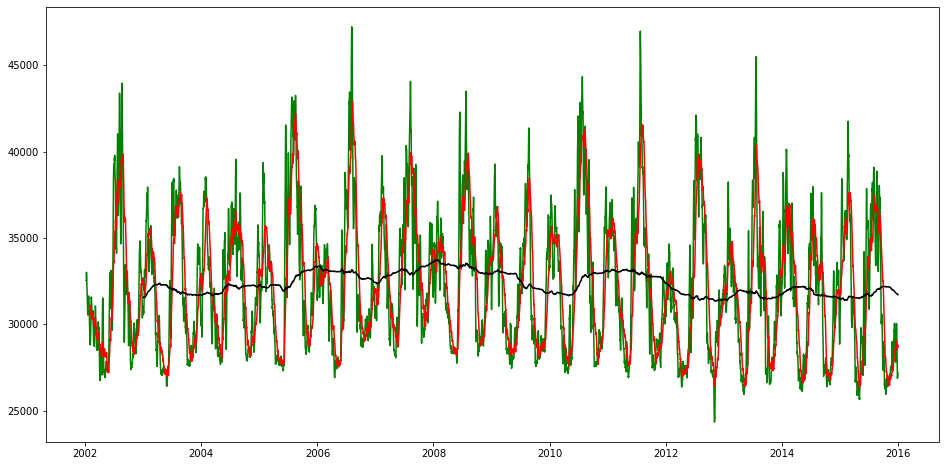

In [188]:
plt.figure(figsize=(16,8))
#plt.plot(day_rollmean, color = 'blue')
plt.plot(week_rollmean, color = 'green')
plt.plot(month_rollmean, color = 'red')
plt.plot(year_rollmean, color = 'black')

In [189]:
from statsmodels.tsa.stattools import adfuller

In [193]:
dftest = adfuller(train.PJME_MW, autolag = 'AIC')

In [194]:
dftest

(-20.57042888976383,
 0.0,
 72,
 122613,
 {'1%': -3.4304033339605713,
  '5%': -2.8615635728228987,
  '10%': -2.5667825469804137},
 1772948.6042730866)

In [192]:
#the first number is the test statistic, the second is the p-value, the third is the number of lags used, the fourth si the
#number of observations used; the % in the dictionaries are critical values for the test; not sure what the last one is

In [199]:
#calculating the  exponential weighted mean

day_exp_wm = train.PJME_MW.ewm(halflife = 24, min_periods =0, adjust=True).mean()
month_exp_wm = train.PJME_MW.ewm(halflife = 24*30, min_periods =0, adjust=True).mean()
year_exp_wm = train.PJME_MW.ewm(halflife = 24*365, min_periods =0, adjust=True).mean()

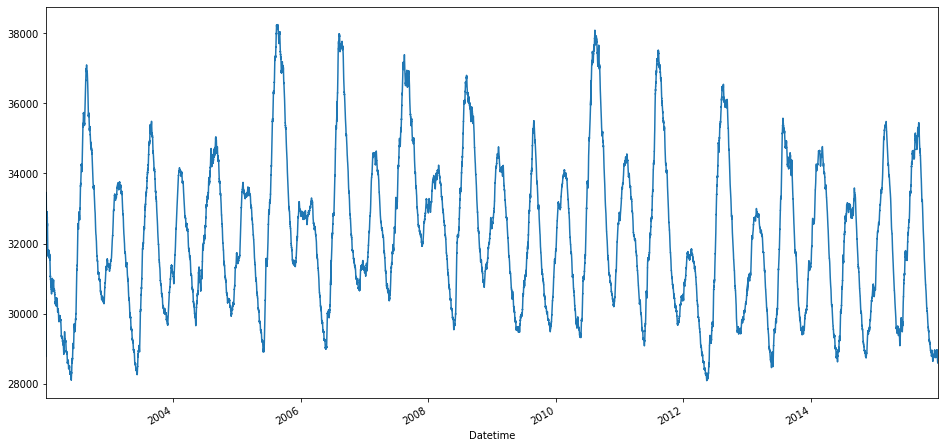

In [202]:
month_exp_wm.plot(figsize = (16,8))

In [214]:
shift_exp = train.PJME_MW - train.PJME_MW.shift(1, freq = 'Y')

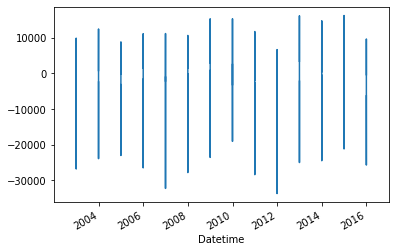

In [215]:
shift_exp.plot()

In [218]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [231]:
decomposition = seasonal_decompose(train.PJME_MW, freq = 24*30)

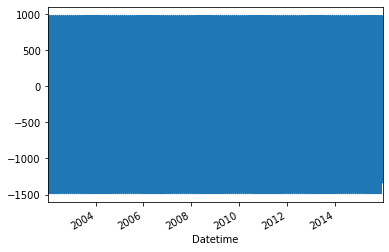

In [232]:
decomposition.seasonal.plot()

In [ ]:
#not entirely sure what is going on here

In [247]:
hourly_diffs = train.PJME_MW.diff(periods = 1)
hourly_diffs = hourly_diffs[1:]

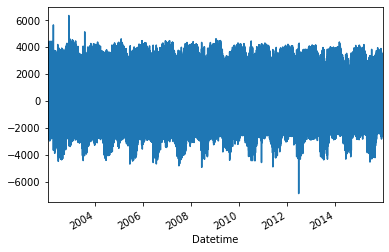

In [236]:
hourly_diffs.plot()

In [238]:
from statsmodels.graphics.tsaplots import plot_acf

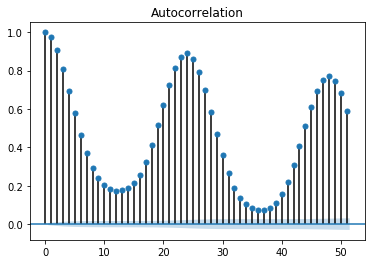

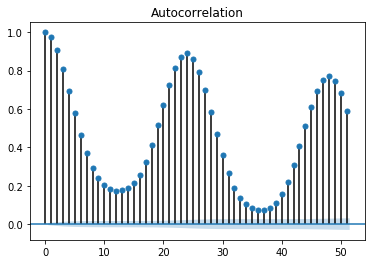

In [239]:
plot_acf(train.PJME_MW)

In [240]:
#the autocorrelation plot shows our daily trend: there's a first peak around 24, and a slightly lower peak around 48

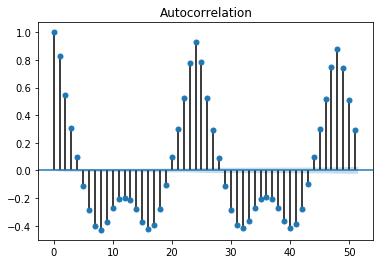

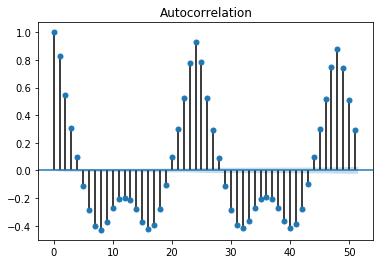

In [248]:
plot_acf(hourly_diffs)

In [249]:
daily_diffs = train.PJME_MW.diff(periods = 24)
daily_diffs = daily_diffs[24:]

In [250]:
#we can see from our acf plots that there are still correlations even when considering the daily and hourly diffs, so that
#taking these differences does not make our data stationary

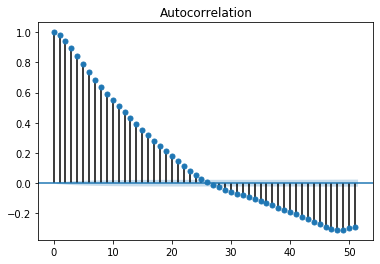

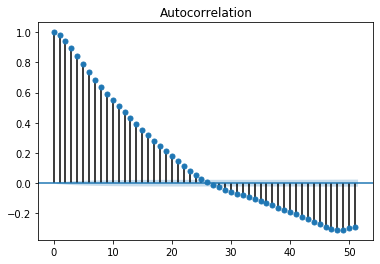

In [246]:
plot_acf(daily_diffs)

In [251]:
#in an Arima model, one of the components is simply this difference of one hour, or one day, or one year...
#let's see if we  still have this when we shift by year

In [252]:
yearly_diffs = train.PJME_MW.diff(periods = 24*365)
yearly_diffs = daily_diffs[24*365:]

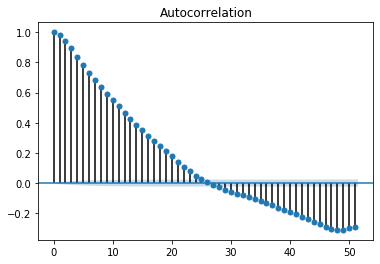

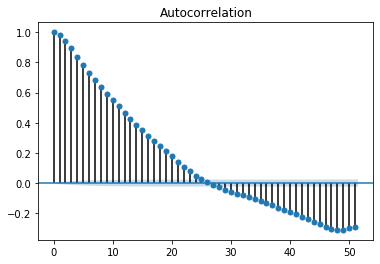

In [253]:
plot_acf(yearly_diffs)

In [254]:
#we see the same correlation simply because of the hours; since our time series repeats each hour, night time electricity 
#consumption is still varying the same day with night time electricity consumption the next year

In [255]:
#we can directly fit AR, ARIMA and other models to our data; however, right now, the hypothesis which are needed for an ARIMA
#model to be valid are not met
#they probably would be met if I had daily energy consumption instead of hourly

In [256]:
from statsmodels.tsa.arima_model import ARIMA

In [262]:
#arima parameters: p indicates the number of periods to take into account, q is the number of periods in moving average, d is the lag

arima_model = ARIMA(train.PJME_MW, order = (1,1,1))

arima_model_fit = arima_model.fit(train.PJME_MW)

C:\Users\pc\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\pc\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\pc\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:651: RuntimeWarning: invalid value encountered in arctanh
  invarcoefs = 2*np.arctanh(params)


KeyboardInterrupt: 

In [ ]:
predictions = arima_model_fit.predict(periods = 24*365)

In [263]:
#experimenting with so much data is not a good idea, so I'm going to take daily values to reduce the size of my data 24 fold

In [264]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 122686 entries, 2002-01-01 01:00:00 to 2015-12-31 23:00:00
Data columns (total 15 columns):
PJME_MW       122686 non-null float64
date_time     122686 non-null datetime64[ns]
date          122686 non-null object
day           122686 non-null int64
month         122686 non-null int64
year          122686 non-null int64
wday          122686 non-null int64
yday          122686 non-null int64
yweek         122686 non-null int64
hour          122686 non-null int64
quarter       122686 non-null int64
holiday       122686 non-null bool
before_hol    122686 non-null bool
after_hol     122686 non-null bool
b             122686 non-null object
dtypes: bool(3), datetime64[ns](1), float64(1), int64(8), object(2)
memory usage: 17.5+ MB


In [266]:
daily_consumption = train.groupby(['date']).PJME_MW.sum()

In [267]:
daily_consumption

date
2002-01-01    714857.0
2002-01-02    822277.0
2002-01-03    828285.0
2002-01-04    809171.0
2002-01-05    729723.0
                ...   
2015-12-27    602383.0
2015-12-28    702011.0
2015-12-29    716158.0
2015-12-30    696312.0
2015-12-31    667293.0
Name: PJME_MW, Length: 5113, dtype: float64

In [269]:
#this was interrupted after almost 30 minutes, which is insane for 5000 rows of data; something is wrong in the way I'm using 
#Arima

In [272]:
daily_consumption.index = pd.to_datetime(daily_consumption.index)

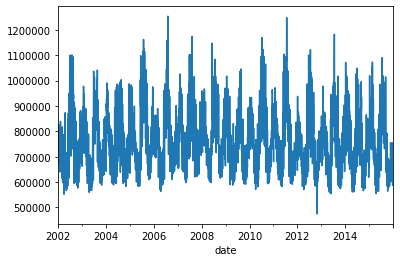

In [274]:
daily_consumption.plot()

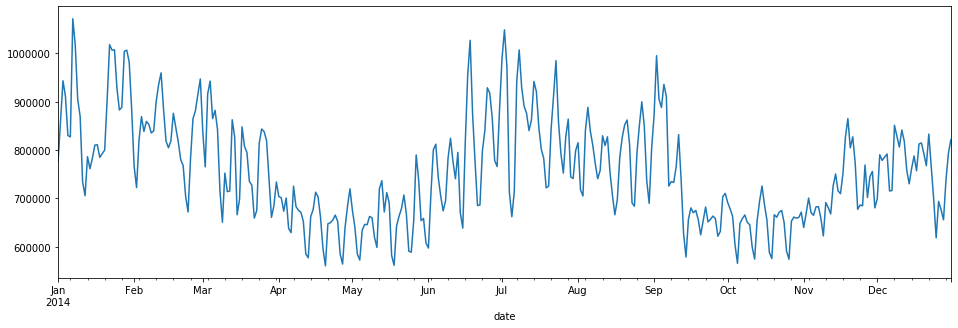

In [278]:
daily_consumption['2014'].plot(figsize = (16,5)) # pandas understands simple date expressions like this automatically

In [279]:
consump_day_2014 = daily_consumption['2014']

In [281]:
split_date = '2014-9-1'
train, test = consump_day_2014[consump_day_2014.index<split_date], consump_day_2014[consump_day_2014.index>split_date]

In [284]:
test

date
2014-09-02    995310.0
2014-09-03    905425.0
2014-09-04    888205.0
2014-09-05    936029.0
2014-09-06    910700.0
                ...   
2014-12-27    677121.0
2014-12-28    655828.0
2014-12-29    738076.0
2014-12-30    793600.0
2014-12-31    821636.0
Name: PJME_MW, Length: 121, dtype: float64

In [286]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(train, order=(7,1,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

C:\Users\pc\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\pc\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:              D.PJME_MW   No. Observations:                  242
Model:                 ARIMA(7, 1, 1)   Log Likelihood               -2972.227
Method:                       css-mle   S.D. of innovations          51978.122
Date:                Tue, 01 Sep 2020   AIC                           5964.455
Time:                        11:39:55   BIC                           5999.344
Sample:                    01-02-2014   HQIC                          5978.509
                         - 08-31-2014                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             -47.8638   1633.891     -0.029      0.977   -3250.231    3154.503
ar.L1.D.PJME_MW    -0.4219      0.166     -2.545      0.012      -0.747      -0.097
ar.L2.D.PJME_MW    -0.4805      

In [291]:
predictions = pd.DataFrame(model_fit.forecast(steps=len(test))[0])

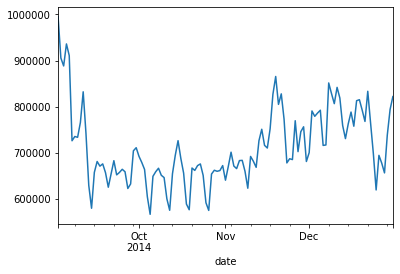

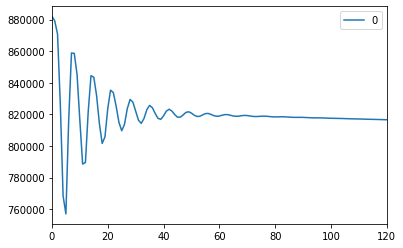

In [292]:
test.plot()
predictions.plot()

In [293]:
#the results are not good, but at least I'm getting results with reasonable speed
#now let's try training the model on 2 consecutive years of data and predicting the next 3 months to see if it makes more sense

In [298]:
first_two_years = daily_consumption[daily_consumption.index.year<2004]

In [313]:
#we need to start by performing an adfuller test on the data to see if it is stationary or not

adfuller(first_two_years)
#the important value, the pvalue, is 0.12; that's not enough to reject the null hypothesis that the data is non stationary
#therefore we'll have to do something to make the data stationary before we process it

(-2.464389224148558,
 0.12438093359704427,
 19,
 710,
 {'1%': -3.439593802573824,
  '5%': -2.865619356068967,
  '10%': -2.568942332870462},
 17171.78737151024)

In [320]:
#we know that electricity consumption follows a weekly cycle which matters; therefore, differencing by a shift of 7 makes more
#sense than differencing with a shift of 1, since that would create noise between weekdays and weekends which the model would
#not necessarily interpret correctly

first_2y_weekdiff = first_two_years - first_two_years.shift(7)
first_2y_weekdiff = first_2y_weekdiff[7:]
first_2y_weekdiff.head()

date
2002-01-08    109853.0
2002-01-09    -11649.0
2002-01-10    -72968.0
2002-01-11    -66430.0
2002-01-12    -46518.0
Name: PJME_MW, dtype: float64

In [322]:
adfuller(first_2y_weekdiff)
#this differencing gives us a very tiny p-value, which suggests that our data is now very stationary

(-6.869804659356455,
 1.5259030251688106e-09,
 16,
 706,
 {'1%': -3.439646367660705,
  '5%': -2.8656425177031375,
  '10%': -2.5689546724554404},
 17021.511518129497)

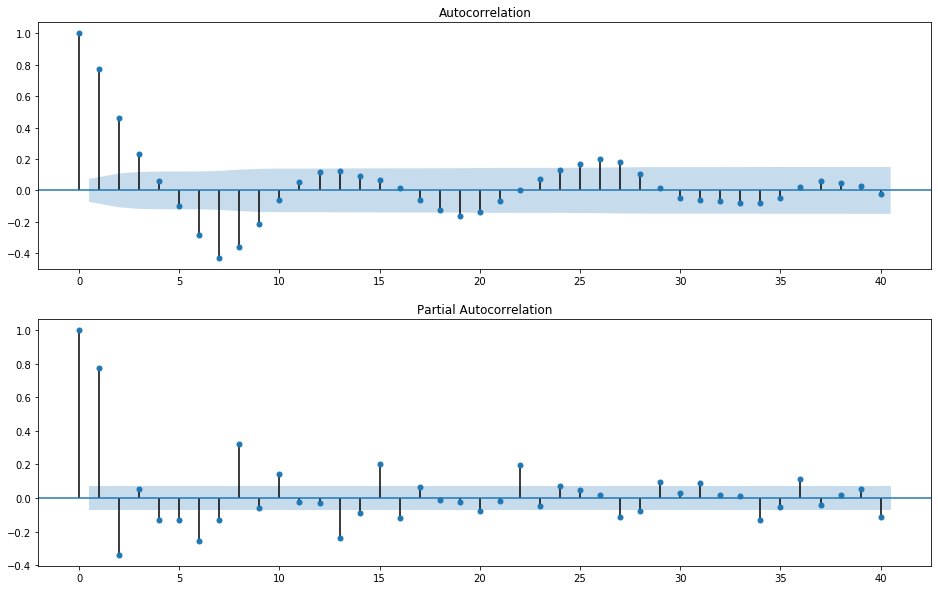

In [324]:
#the second step is to make an auto correlation plot to determine which parameter to use as p

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig = plt.figure(figsize=(16, 10))
ax1 = fig.add_subplot(211)
fig = plot_acf(first_2y_weekdiff, lags=40, ax = ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(first_2y_weekdiff, lags=40, ax=ax2)


In [ ]:
#we can observe sudden shutdown of partial autocorrelation at 1, and exponential decrease of autocorrelation at 3 or 4; 
#this suggests we should take the parameters 1 for p, and 3 or 4 for q; for d, I'm still not sure, I'll try 0 and 1

In [325]:
model = ARIMA(first_2y_weekdiff, order=(1,1,3))
model_fit = model.fit(disp=0)
print(model_fit.summary())

C:\Users\pc\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\pc\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:              D.PJME_MW   No. Observations:                  722
Model:                 ARIMA(1, 1, 3)   Log Likelihood               -8868.583
Method:                       css-mle   S.D. of innovations          52096.534
Date:                Tue, 01 Sep 2020   AIC                          17749.165
Time:                        12:57:36   BIC                          17776.657
Sample:                    01-09-2002   HQIC                         17759.777
                         - 12-31-2003                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -3.4980     33.876     -0.103      0.918     -69.894      62.898
ar.L1.D.PJME_MW     0.5770      0.053     10.805      0.000       0.472       0.682
ma.L1.D.PJME_MW    -0.5116      

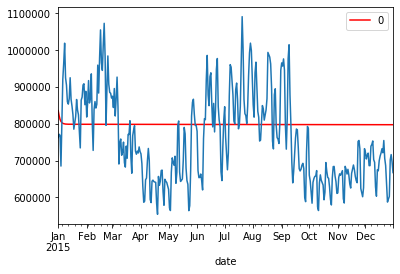

In [327]:
preds = model_fit.forecast(steps=365)[0] + 800000
y_true = daily_consumption['2015']
y_hat = pd.DataFrame(preds, index = y_true.index)
y_hat.plot(color='red')
y_true.plot()

#obviously this doesn't work because my model would need to be undifferentiated, meaning that we would need to start by adding 
#the values of the week prior; this has been corrected, but the Arima model didn't predict any of the seasonal trends

In [334]:
import statsmodels.tsa.statespace.sarimax as smsp

In [339]:
first_2y_weekdiff.shape

(723,)

In [340]:
seasonal_model = smsp.SARIMAX(first_2y_weekdiff, order = (1,1,3), seasonal_order = (1,1,3,0))

C:\Users\pc\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ValueError: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions

In [338]:
results = seasonal_model.fit()
#predictions = results.forecast(steps=365)

ValueError: maxlag should be < nobs